<a href="https://colab.research.google.com/github/karikaalan0207/DL_Rep/blob/master/Digit_Recogition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Framework and Other Libraries**

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit
import numpy as np
import pylab as plt


import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


**Data Pre-Processing**

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Building a Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

**Learning**

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 783us/step - loss: 0.3211 - accuracy: 0.9001 - val_loss: 0.0791 - val_accuracy: 0.9741
Epoch 2/10
60000/60000 [==============================] - 47s 778us/step - loss: 0.1097 - accuracy: 0.9667 - val_loss: 0.0457 - val_accuracy: 0.9840
Epoch 3/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0820 - accuracy: 0.9755 - val_loss: 0.0433 - val_accuracy: 0.9860
Epoch 4/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0669 - accuracy: 0.9804 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 5/10
60000/60000 [==============================] - 46s 768us/step - loss: 0.0580 - accuracy: 0.9821 - val_loss: 0.0295 - val_accuracy: 0.9899
Epoch 6/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0310 - val_accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] 

**Evaluating the Model**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.023579105499738944
Test accuracy: 0.9916999936103821


**Sample Testing from the Test Set , Choosing 126th Sample Image**

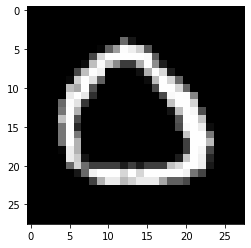

In [ ]:

plt.imshow(x_test[126].reshape(28,28),cmap='gray')
plt.show()

**Predict 126th Test Sample**

In [ ]:
import numpy as np
prediction = model.predict(x_test[126:127])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [9.99887586e-01 2.70945595e-08 5.14442536e-06 1.97282148e-07
 9.23706764e-08 1.39645999e-06 2.95413861e-06 6.01289116e-07
 1.90325045e-06 1.00055615e-04]

Thresholded Score:
 [1 0 0 0 0 0 0 0 0 0]

Predicted Digit:
 0


**Save the Model Locally**

In [ ]:
model.save("digit_recog_cnn_model.h5")